# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [38]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
import en_core_web_sm

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q='bitcoin',
    language='en',
    sort_by='relevancy'
)

In [7]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q='ethereum',
    language='en',
    sort_by='relevancy'
)

In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments =[]

for articles in bitcoin_news['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
   # Data into sentiments
        bitcoin_sentiments.append({
            'Compound': compound,
            'Negative': neg,
            'Neutral': neu,
            'Positive': pos,
            'text': text})
            
            
    except AttributeError:
        pass
bitcoin = pd.DataFrame(bitcoin_sentiments)
bitcoin.head()

,Compound,Negative,Neutral,Positive,text
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the..."
3,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...
4,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...


In [15]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments =[]

for articles in ethereum_news['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
   # Data into sentiments
        ethereum_sentiments.append({
            'Compound': compound,
            'Negative': neg,
            'Neutral': neu,
            'Positive': pos,
            'text': text})
            
            
    except AttributeError:
        pass
ethereum = pd.DataFrame(ethereum_sentiments)
ethereum.head()

,Compound,Negative,Neutral,Positive,text
0,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...
1,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...
2,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...
3,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...
4,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...


In [16]:
# Describe the Bitcoin Sentiment
bitcoin.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.220456,0.039944,0.865167,0.095000
std,0.407588,0.055116,0.100639,0.078279
min,-0.557400,0.000000,0.675000,0.000000
25%,0.000000,0.000000,0.797250,0.000000
50%,0.244600,0.000000,0.882000,0.118000
75%,0.571900,0.067250,0.931750,0.150750
max,0.817300,0.176000,1.000000,0.233000


In [17]:
# Describe the Ethereum Sentiment
ethereum.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.089084,0.009789,0.958789,0.031421
std,0.299285,0.023273,0.055260,0.056226
min,-0.381800,0.000000,0.845000,0.000000
25%,0.000000,0.000000,0.929500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.170600,0.000000,1.000000,0.037000
max,0.636900,0.067000,1.000000,0.155000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had highest positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest postiive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Expand the default stopwords list if necessary
wnl = WordNetLemmatizer()

stop = stopwords.words('english')

stop.append('``')
stop.append('\'')
stop.append('...')
stop = set(stop)

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


In [21]:
# Create a new tokens column for bitcoin
bitcoin['tokens'] = bitcoin.text.apply(tokenizer)
bitcoin.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...,"[government, India, considering, 18, tax, bitc..."
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[week, shattered, yearslong, aspiration, reach..."
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the...","[Mt, Gox, went, bankrupt, 2014, world, ’, larg..."
3,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...,"[Ban, reflects, Twitters, failure, promote, he..."
4,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...,"[New, York, CNN, Business, Bitcoin, flirting, ..."


In [22]:
# Create a new tokens column for ethereum
ethereum['tokens'] = ethereum.text.apply(tokenizer)
ethereum.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...,"[Cryptocurrencies, stole, headline, first, sto..."
1,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...,"[Ethereum, creator, Vitalik, Buterin, 14, 11, ..."
2,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...,"[Bitcoin, fizzled, Monday, trading, famously, ..."
3,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[Reuters, Staff, FILE, PHOTO, representation, ..."
4,0.0000,0.00,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: A representati...,"[Reuters, Staff, FILE, PHOTO, representation, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
N = 2
bitcoin_grams = ngrams(tokenizer(bitcoin.text.str.cat()), N)
Counter(bitcoin_grams).most_common(20)

[(('Reuters', 'Bitcoin'), 5),
 (('popular', 'cryptocurrency'), 4),
 (('Bitcoin', 'Wednesday'), 4),
 (('Wednesday', 'hit'), 4),
 (('hit', 'record'), 3),
 (('record', '28,599.99'), 3),
 (('28,599.99', 'taking'), 3),
 (('taking', 'gain'), 3),
 (('gain', 'year'), 3),
 (('year', 'past'), 3),
 (('past', '295'), 3),
 (('world', 'popular'), 3),
 (('Jack', 'Dorsey'), 2),
 (('virtual', 'currency'), 2),
 (('char', 'Reuters'), 2),
 (('Reuters', 'Staff'), 2),
 (('Staff', 'LONDON'), 2),
 (('LONDON', 'Dec'), 2),
 (('Dec', '30'), 2),
 (('30', 'Reuters'), 2)]

In [25]:
# Generate the Ethereum N-grams where N=2
N = 2
ethereum_grams = ngrams(tokenizer(ethereum.text.str.cat()), N)
Counter(ethereum_grams).most_common(20)

[(('virtual', 'currency'), 10),
 (('char', 'Reuters'), 9),
 (('Reuters', 'Staff'), 9),
 (('Staff', 'FILE'), 9),
 (('FILE', 'PHOTO'), 9),
 (('illustration', 'taken'), 9),
 (('2020', 'REUTERS/Dado'), 7),
 (('currency', 'Bitcoin'), 6),
 (('PHOTO', 'representation'), 5),
 (('representation', 'virtual'), 5),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 4),
 (('PHOTO', 'Representations'), 4),
 (('Representations', 'virtual'), 4),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('taken', 'November'), 3),
 (('November', '19'), 3),
 (('19', '2020'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('REUTERS/Dado', 'Ruvic'), 3)]

In [26]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Get the top 10 words for Bitcoin
bitcoin_tokens = tokenizer(bitcoin.text.str.cat())
token_count(bitcoin_tokens, 10)

[('char', 18),
 ('Bitcoin', 13),
 ('Reuters', 8),
 ('cryptocurrency', 7),
 ('world', 5),
 ('currency', 5),
 ('year', 5),
 ('LONDON', 5),
 ('record', 5),
 ('new', 4)]

In [28]:
# Get the top 10 words for Ethereum
ethereum_tokens = tokenizer(ethereum.text.str.cat())
token_count(ethereum_tokens, 10)

[('char', 19),
 ('Reuters', 16),
 ('currency', 13),
 ('taken', 12),
 ('Bitcoin', 11),
 ('virtual', 10),
 ('2020', 10),
 ('Staff', 9),
 ('FILE', 9),
 ('PHOTO', 9)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

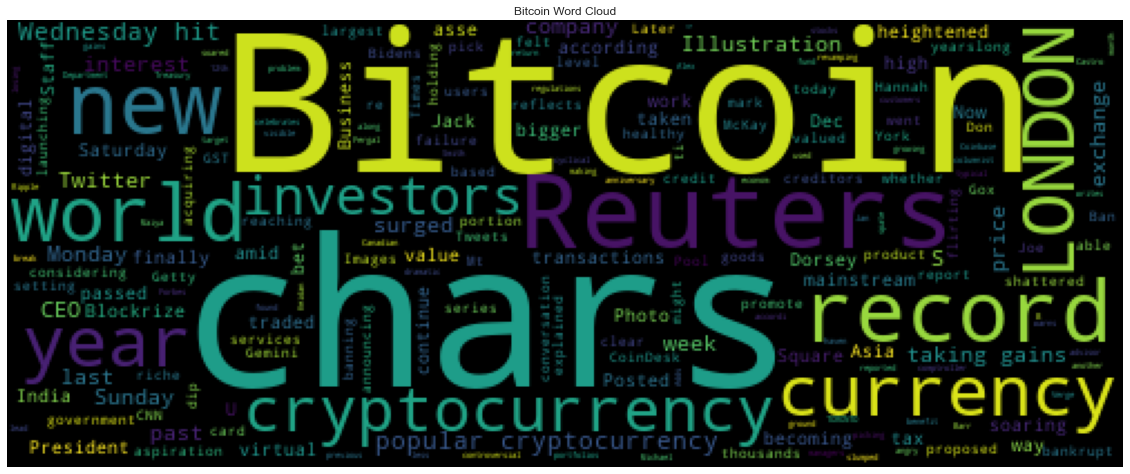

In [33]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=''):
    df_bitcoin_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_bitcoin_cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
wordcloud(bitcoin.text.str.cat(), title="Bitcoin Word Cloud")

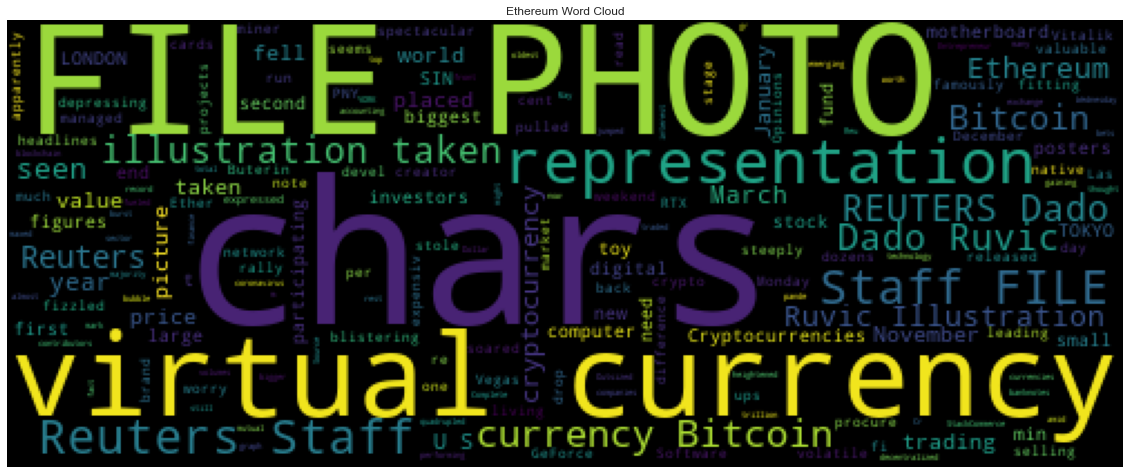

In [34]:
# Generate the Ethereum word cloud
def wordcloud(text, title=''):
    df_ethereum_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_ethereum_cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
wordcloud(ethereum.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [39]:
import spacy
from spacy import displacy

In [40]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [42]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
nlp = en_core_web_sm.load()

## Bitcoin NER

In [45]:
# Concatenate all of the bitcoin text together
all_bitcoin_text = bitcoin.text.str.cat()
all_bitcoin_text

"The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars]Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars]When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, creditors might finally be able to get a portion of those riche… [+626 chars]Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [+3185 chars]New York (CNN Business)Bitcoin has been flirting with the $30,000 mark for weeks, and finally passed that record-setting level Saturday. The

In [47]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(all_bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data['title'] = 'Bitcoin Name Enitity Recognition'

In [48]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent', jupyter=True)

In [50]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

India GPE
18% PERCENT
bitcoin GPE
the Times of India ORG
20,000 MONEY
Bitcoin GPE
Saturday DATE
33,000 MONEY
CoinDesk PERSON
Mt. Gox PERSON
2014 DATE
Bitcoin GPE
850,000 CARDINAL
Bitcoins PERSON
thousands CARDINAL
Twitters NORP
Hannah McKay-Pool/Getty PERSON
Twitter ORG
Jack Dorsey PERSON
Tweets GPE
US GPE
Don PERSON
CNN ORG
$30,000 mark MONEY
weeks DATE
Saturday DATE
above $33,000 MONEY
Gemini PERSON
Blockrize WORK_OF_ART
today DATE
Blockrizes GPE
Later this year DATE
Joe Bidens PERSON
the U.S. Treasury Department ORG
Michael S. Barr PERSON
bitcoin GPE
the popular cryptocurrency exchange ORG
Sunday DATE
Bitcoin GPE
50% PERCENT
the previous month DATE
the week DATE
24.8% PERCENT
Bitcoin GPE
12th ORDINAL
Forbes ORG
Fergal Smith PERSON
Maiya Keidan PERSON
Reuters ORG
Canadian NORP
Reuters ORG
LONDON GPE
Dec 30 DATE
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
this year DATE
295% PERCENT
3.5% PERCENT
28,349 MONEY
Alex Castro PERSON
The Verge ORG
Jack Dorsey PERSON
Twit

---

## Ethereum NER

In [51]:
# Concatenate all of the bitcoin text together
all_ethereum_text = ethereum.text.str.cat()
all_ethereum_text

"Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.\r\nBut investors need not worry … [+2877 chars]Ethereum creator Vitalik Buterin.\r\n14 with 11 posters participating\r\nEther, the native currency of the Ethereum network and the second most valuable cryptocurrency, has soared above $1,000 for the fi… [+3015 chars]Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPrices fell as much as 17 per cent in the biggest drop since March before re… [+2174 chars]By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - Bitcoin fell more t… [+293 chars]By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency bitcoin is seen in this illustration taken November 19, 2020. R

In [53]:
# Run the NER processor on all of the text
ethereum_ner = nlp(all_ethereum_text)

# Add a title to the document
ethereum_ner.user_data['title'] = 'Ethereum Name Enitity Recognition'

In [55]:
# Render the visualization
displacy.render(ethereum_ner, style='ent', jupyter=True)

In [56]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text, ent.label_)

first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
2020 DATE
Las Vegas GPE
dozens CARDINAL
3080 CARDINAL
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
second ORDINAL
December 2020 DATE
first ORDINAL
Ethereum 2.0 ORG
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
digital ORG
this year DATE
YORK PERSON
Reuters ORG
U.S. GPE
the years DATE
U.S. GPE
chars]1 CARDINAL
1 CARDINAL
more than $1 